# Mask R-CNN - Mask study

<i> Sébastien Ohleyer </i>

Inspect and visualize data loading and pre-processing code. 

Python 3

In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

%matplotlib inline 

ROOT_DIR = os.getcwd()

/Users/sebastienohleyer/anaconda3/envs/objreco_namr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
ROOT_DIR

'/Users/sebastienohleyer/Documents/ENS MVA/Object recognition/mask_rcnn'

## Configurations

In [3]:
import aerial
config = aerial.AerialConfig()
AERIAL_DIR = "../AerialImageDataset/"  # TODO: enter value here
TOWN_LIST = ["austin", "chicago", "kitsap", "tyrol-w", "vienna"]

## Dataset

In [4]:
# Load dataset
dataset = aerial.AerialDataset()
dataset.load_aerial(AERIAL_DIR, "train")
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Info: {}".format(dataset.class_info))

Image Count: 180
Class Info: [{'source': '', 'id': 0, 'name': 'BG'}, {'source': 'aerial', 'id': 1, 'name': 'building'}]


In [5]:
#dataset.image_ids

In [6]:
#Load a test image
image_test_id = np.random.choice(dataset.image_ids)
image_test_name = dataset.image_info[image_test_id]['image_name']
image = dataset.load_image(image_test_id)
_,_, full_mask = dataset.load_mask(image_test_id)

<function matplotlib.pyplot.show>

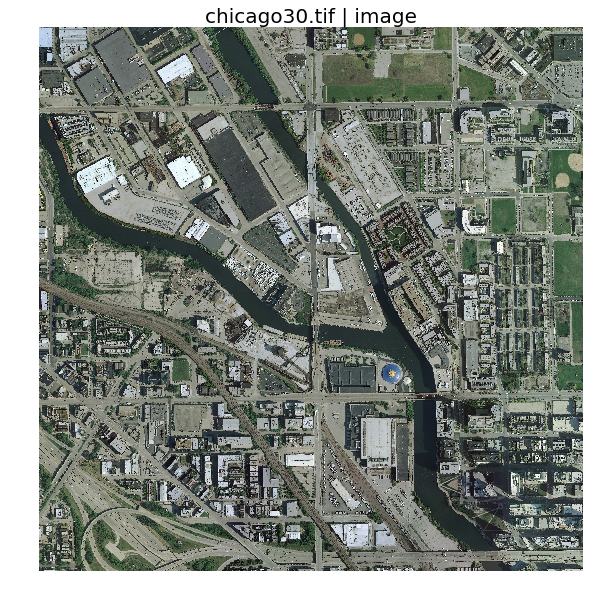

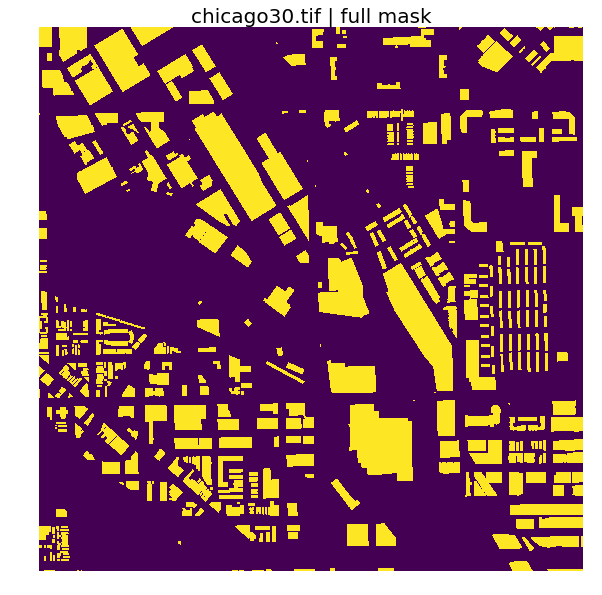

In [7]:
import imageio

plt.figure(figsize=(10,10))
plt.imshow( image )
plt.axis('off')
plt.title(image_test_name + ' | image', fontsize=20)
plt.show

plt.figure(figsize=(10,10))
plt.imshow( full_mask )
plt.axis('off')
plt.title(image_test_name + ' | full mask', fontsize=20)
plt.show

In [16]:
#Check the image sizes
#images_sizes=[]
#for image_id in dataset.image_ids:
#    images_sizes.append(dataset.load_image(image_id).shape)
#images_sizes

# checked (5000, 5000, 3)

In [17]:
#Check the mask sizes
#masks_sizes=[]
#for image_id in dataset.image_ids:
#    masks_sizes.append(dataset.load_mask(image_id).shape)
#masks_sizes

# checked (5000, 5000) taking values in {0,255}

## Mask study
Before eventually study bounding box, we performe a little study on every instance of the mask, to see if it is relevant to try Mask R-CNN.

In [18]:
from skimage.measure import label,regionprops
(instance_labels, num_instances) = label(full_mask, return_num =1, connectivity=2)
props = regionprops(instance_labels)
print('number of instance of the test image : ' + str(num_instances))

number of instance of the test image : 851


In [19]:
areas = np.array([props[i].area for i in range(num_instances)])
areas.argsort()[-3:][::-1]+1

array([135,  11, 203])

**Instance of maximum size**

Note that $\texttt{label}=\{1,...,\texttt{num_instance}\}$ and $\texttt{props}=\{0,...,\texttt{num_instance}-1\}$.

<function matplotlib.pyplot.show>

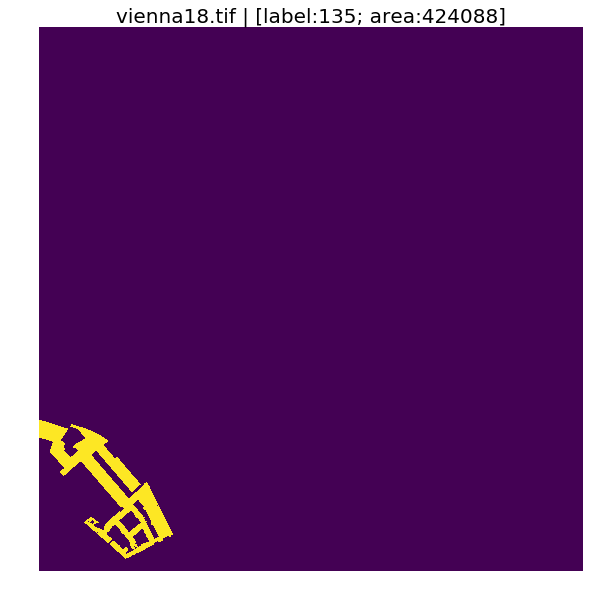

In [20]:
instance_label = np.argmax([props[i].area for i in range(num_instances)])+1
plt.figure(figsize=(10,10))
plt.imshow( instance_labels==instance_label )
plt.axis('off')
plt.title(image_test_name +' | [label:' + str(instance_label) + '; area:'+ str(props[instance_label-1].area)+ ']', fontsize=20)
plt.show

**Histogram of area sizes**

In [15]:
list_instance_sizes = [props[i].area for i in range(num_instances)]

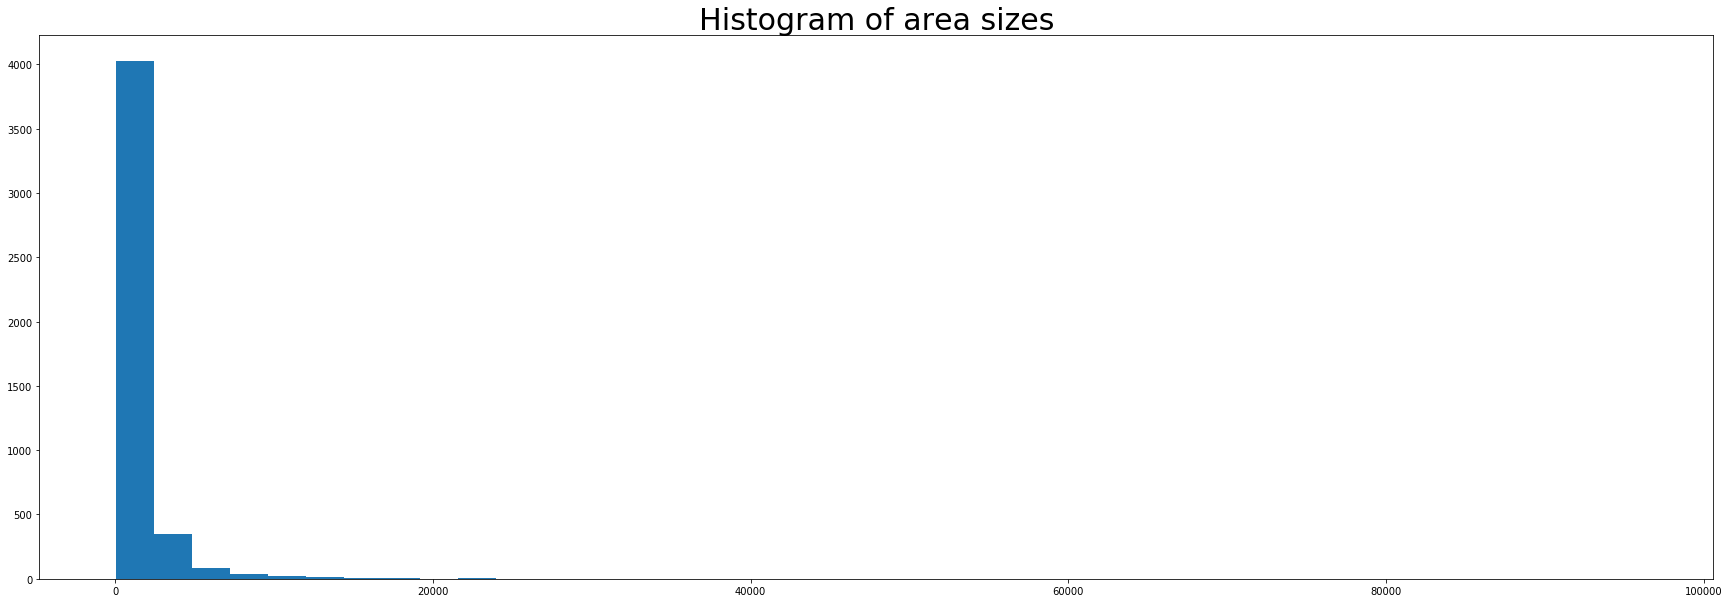

In [16]:
area_lim = 10000000000
plt.figure(figsize=(30,10)); 
plt.hist([instance_size for instance_size in list_instance_sizes if instance_size<=area_lim], bins=40); 
plt.title('Histogram of area sizes', fontsize=30); plt.show()

**Plot the deleted mask**

In [17]:
#area_lim_mask = 1000
#delete_mask = np.zeros(full_mask.shape); j=0
#for i in range(num_instance):
#    if props[i].area < area_lim_mask:
#        delete_mask += (instance_labels==(i+1)) 

In [18]:
#plt.figure(figsize=(10,10))
#plt.imshow( delete_mask ); plt.axis('off')
#plt.title(image_test_name +' | deleted_mask [area_lim_mask: '+str(area_lim_mask) +']', fontsize=20); plt.show